In [114]:
#imports - just open cv atm
import cv2
import glob # reading images from local folder
from matplotlib import pyplot as plt # just for testing images

#remove the red and blue value from each pixel
def remove_RB(image):
    rows,columns,channels = image.shape
    for x in range(rows):
        for y in range(columns):
            image[x, y, 0] = 0 # remove red value
            image[x, y, 2] = 0 # remove blue value
    return image

def isolate_hand(image):
    rows,columns,channels = image.shape
    count = 0
    for x in range(rows):
        for y in range(columns):
            # check if blue is greater than 125, changed to black
            if(image[x, y, 2] <= 150):
                image[x, y, 0] = 0
                image[x, y, 1] = 0 
                image[x, y, 2] = 0
            else:
                count += 1 #count of hand pixels
    return image, count

def count_coverage(image):
    rows,columns,channels = image.shape
    count = 0
    for x in range(rows):
        for y in range(columns):
            if (image[x, y, 1] > 5):
                count += 1
    return count


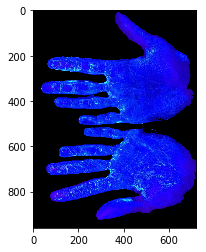

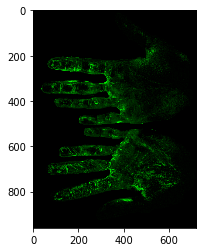

0.7074431887408658


In [115]:
#TESTING 

#import images from folder stored in path
path = glob.glob('handwash/*.jpg')
image_list = []
for file in path:
    image = cv2.imread(file) #read image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert to RGB
    image_list.append(image) #adds image to list  
test = image_list[1]
mask, count = isolate_hand(test)
plt.imshow(mask)
plt.show()
result = remove_RB(mask)
plt.imshow(result)
plt.show()
coverage = count_coverage(result)
percent = coverage/count
print(percent)